# SISTEMAS DE RECOMENDACIÓN PARA EL DATASET JESTER.  
### Contiene 25k usuarios que han valorado 100 chistes.

## Procesado del archivo

1. **Separar los datos en columnas**  
   El archivo original contiene todos los ratings de un usuario en una sola cadena separada por `;`. Se divide en 101 columnas (una para el número de ratings, y 100 para los chistes).

2. **Convertir las comas decimales a puntos**  
   Los ratings están en formato europeo (por ejemplo: `7,85`), por lo que es necesario convertir `,` a `.` para que Python los interprete como `float`.

3. **Cambiar los valores `99` a `NaN`**  
   El valor `99` indica que el usuario **no valoró** ese chiste, por lo tanto se reemplaza con `NaN`.

4. **Obtener una matriz usuarios × chistes**  
   Se obtiene una matriz final de `24,983 usuarios × 100 chistes`, con ratings reales (de -10 a +10) y `NaN` donde no hay valoración.



In [2]:
import pandas as pd


file_path = "jester-data-1.csv"

df_tab = pd.read_csv(file_path, delimiter='\t', header=None, on_bad_lines='skip')


print(df_tab.shape)
print(df_tab.head())

(24983, 1)
                                                   0
0  74;-7,82;8,79;-9,66;-8,16;-7,52;-8,5;-9,85;4,1...
1  100;4,08;-0,29;6,36;4,37;-2,38;-9,66;-0,73;-5,...
2  49;99;99;99;99;9,03;9,27;9,03;9,27;99;99;7,33;...
3  48;99;8,35;99;99;1,8;8,16;-2,82;6,21;99;1,84;7...
4  91;8,5;4,61;-4,17;-5,39;1,36;1,6;7,04;4,61;-0,...


In [3]:
import numpy as np

# Dividimos los datos por ";" y expandir a columnas
df_split = df_tab[0].str.split(';', expand=True)

# Puntos en vez de comas
df_split = df_split.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Convertir a float
df_split = df_split.astype(float)

# Reemplazar los valores 99 por NaN (sin rating)
df_split.replace(99.0, np.nan, inplace=True)

# Separar la columna con el número de ratings (puede ser útil para filtrado)
ratings_count = df_split.iloc[:, 0]
ratings_data = df_split.iloc[:, 1:]  # Solo las columnas con ratings

# Mostrar dimensiones y algunas filas limpias
ratings_data.shape, ratings_data.head(), ratings_count.head()


/var/folders/s8/mfl3ssh12jvfdt_brpcmp0fh0000gn/T/ipykernel_36154/541319789.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_split = df_split.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


((24983, 100),
     1     2     3     4     5     6     7     8     9     10   ...   91   \
 0 -7.82  8.79 -9.66 -8.16 -7.52 -8.50 -9.85  4.17 -8.98 -4.76  ...  2.82   
 1  4.08 -0.29  6.36  4.37 -2.38 -9.66 -0.73 -5.34  8.88  9.22  ...  2.82   
 2   NaN   NaN   NaN   NaN  9.03  9.27  9.03  9.27   NaN   NaN  ...   NaN   
 3   NaN  8.35   NaN   NaN  1.80  8.16 -2.82  6.21   NaN  1.84  ...   NaN   
 4  8.50  4.61 -4.17 -5.39  1.36  1.60  7.04  4.61 -0.44  5.73  ...  5.19   
 
     92    93    94    95    96    97    98    99    100  
 0   NaN   NaN   NaN   NaN   NaN -5.63   NaN   NaN   NaN  
 1 -4.95 -0.29  7.86 -0.19 -2.14  3.06  0.34 -4.32  1.07  
 2   NaN   NaN  9.08   NaN   NaN   NaN   NaN   NaN   NaN  
 3   NaN   NaN  0.53   NaN   NaN   NaN   NaN   NaN   NaN  
 4  5.58  4.27  5.19  5.73  1.55  3.11  6.55  1.80  1.60  
 
 [5 rows x 100 columns],
 0     74.0
 1    100.0
 2     49.0
 3     48.0
 4     91.0
 Name: 0, dtype: float64)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Usar los datos limpios cargados previamente: ratings_data

# Para simplificar y reducir tiempo de ejecución, podemos quedarnos con una muestra (opcional)
# Aquí no se reduce, pero puedes activar esto si necesitas:
# ratings_data = ratings_data.sample(n=5000, random_state=42)

# Crear una lista de tripletas (usuario, item, rating)
ratings_long = ratings_data.stack().reset_index()
ratings_long.columns = ['user_id', 'item_id', 'rating']

# Dividir en conjunto de entrenamiento y prueba
train_data, test_data = train_test_split(ratings_long, test_size=0.2, random_state=42)

# Mostrar tamaños de los conjuntos y una muestra
train_data.shape, test_data.shape, train_data.head()


((1448364, 3),
 (362091, 3),
          user_id  item_id  rating
 1206583    16664       24   -4.85
 804465     11153       90    8.98
 718749      9941       97    7.82
 1728002    23847       99   -6.17
 1102038    15260       94   -5.83)

## ⚙️ Modelado y Comparación de Técnicas

Se han comparado las siguientes técnicas de recomendación:

### 🔸 1. Modelo Base (Media Global)
- Predice siempre la media global de los ratings.
- Sirve como punto de comparación mínimo.

### 🔸 2. KNN (User-Based)

### 🔸 3. Matrix Factorization (SVD)

### 🔸 4. Bernoulli Matrix Factorization

---

## 📊 Métrica Utilizada

- **MAE (Mean Absolute Error)**: error absoluto medio entre predicciones y valores reales.




## ----- MEDIA GLOBAL -----

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular la media de ratings en el conjunto de entrenamiento
global_mean = train_data['rating'].mean()
print(f"Media global de los ratings (baseline): {global_mean:.4f}")

# Predecir esa media para todos los casos del conjunto de test
y_test = test_data['rating'].values
y_pred_baseline = np.full_like(y_test, fill_value=global_mean, dtype=float)

# Evaluar
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)

print(f"[Baseline] MAE: {mae_baseline:.4f}")




Media global de los ratings (baseline): 0.8786
[Baseline] MAE: 4.3701
[Baseline] RMSE: 5.2369


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## ----- KNN -----

Definimos algunas constantes útiles

In [ ]:
NUM_USERS = train_data['user_id'].nunique()
NUM_ITEMS = train_data['item_id'].nunique()

MIN_RATING = -10  # según me dijiste
MAX_RATING = 10

Cargamos el dataset en la matriz de votaciones train y test.

In [ ]:
import pandas as pd
import numpy as np

# Paso 1: Crear matriz usuario-ítem para train
ratings_df = train_data.pivot(index='user_id', columns='item_id', values='rating')

# Paso 2: Crear matriz usuario-ítem para test
test_ratings_df = test_data.pivot(index='user_id', columns='item_id', values='rating')

# Llenamos los NaNs con None si quieres mantener el mismo comportamiento que antes
ratings = ratings_df.to_numpy()
test_ratings = test_ratings_df.to_numpy()

# Opcional: asegurar que las matrices sean del mismo tamaño
ratings_df = ratings_df.reindex(index=sorted(train_data['user_id'].unique()),
                                 columns=sorted(train_data['item_id'].unique()))
test_ratings_df = test_ratings_df.reindex_like(ratings_df)


Definimos también algunas funciones auxiliares que nos serán útiles:

In [ ]:
def rating_average(user_id):
    if user_id not in ratings_df.index:
        return 0
    user_ratings = ratings_df.loc[user_id]
    valid_ratings = user_ratings.dropna()
    if valid_ratings.empty:
        return 0
    return valid_ratings.mean()


Ahora definimos algunos métodos para calcular similaridad

In [ ]:
import math

def correlation_similarity(user_u, user_v):
    # Asegurarse de que ambos usuarios existan
    if user_u not in ratings_df.index or user_v not in ratings_df.index:
        return None

    ratings_u = ratings_df.loc[user_u]
    ratings_v = ratings_df.loc[user_v]

    # Seleccionar ítems que ambos hayan valorado
    common_items = ratings_u.notna() & ratings_v.notna()

    if not common_items.any():
        return None

    r_u = ratings_u[common_items]
    r_v = ratings_v[common_items]

    avg_u = r_u.mean()
    avg_v = r_v.mean()

    num = ((r_u - avg_u) * (r_v - avg_v)).sum()
    den_u = ((r_u - avg_u) ** 2).sum()
    den_v = ((r_v - avg_v) ** 2).sum()

    if den_u != 0 and den_v != 0:
        return num / math.sqrt(den_u * den_v)
    else:
        return None


In [ ]:
def jmsd_similarity(user_u, user_v):
    # Verifica que los usuarios existan
    if user_u not in ratings_df.index or user_v not in ratings_df.index:
        return None

    ratings_u = ratings_df.loc[user_u]
    ratings_v = ratings_df.loc[user_v]

    # Ítems valorados por al menos uno
    mask_u = ratings_u.notna()
    mask_v = ratings_v.notna()

    union_mask = mask_u | mask_v
    intersection_mask = mask_u & mask_v

    union_count = union_mask.sum()
    intersection_count = intersection_mask.sum()

    if intersection_count == 0:
        return None

    # Normalizamos los ratings entre 0 y 1
    r_u = (ratings_u[intersection_mask] - MIN_RATING) / (MAX_RATING - MIN_RATING)
    r_v = (ratings_v[intersection_mask] - MIN_RATING) / (MAX_RATING - MIN_RATING)

    # MSD: diferencia media al cuadrado
    msd = ((r_u - r_v) ** 2).mean()

    # Jaccard: proporción de coincidencia
    jaccard = intersection_count / union_count

    return jaccard * (1 - msd)


Pasamos a la búsqueda de los `k` vecinos

In [ ]:
def get_neighbors(user_u, similarities, k=20):
    # similarities es un diccionario o lista con índice = user_id y valor = similitud
    # Excluimos al propio usuario y los None
    filtered = {user_v: sim for user_v, sim in similarities.items()
                if user_v != user_u and sim is not None}

    # Ordenamos por similitud descendente y tomamos los k más altos
    sorted_neighbors = sorted(filtered.items(), key=lambda x: x[1], reverse=True)

    # Retornamos solo los IDs de los vecinos
    neighbors = [user_id for user_id, _ in sorted_neighbors[:k]]

    return neighbors


In [ ]:
# Probamos con un usuario específico

user_u = 112

# Calculamos las similitudes con todos los demás usuarios
similarities_corr = {
    user_v: correlation_similarity(user_u, user_v)
    for user_v in ratings_df.index if user_v != user_u
}

similarities_jmsd = {
    user_v: jmsd_similarity(user_u, user_v)
    for user_v in ratings_df.index if user_v != user_u
}

# Obtenemos los vecinos más similares (top-k)
neighbors_corr = get_neighbors(user_u, similarities_corr, k=25)
neighbors_jmsd = get_neighbors(user_u, similarities_jmsd, k=25)

# Mostrar los IDs de los vecinos
print("Vecinos por correlación:", neighbors_corr)
print("Vecinos por JMSD:", neighbors_jmsd)


Vecinos por correlación: [3968, 4727, 22998, 14837, 20564, 8611, 10292, 13071, 8540, 9906, 2288, 10472, 19220, 2122, 12411, 9386, 7896, 15189, 19695, 6942, 20242, 15193, 14022, 6453, 62]
Vecinos por JMSD: [13788, 6234, 23844, 14209, 3319, 13084, 18568, 24507, 3850, 18463, 7679, 5330, 2722, 7622, 3591, 14318, 1373, 16664, 17648, 3628, 18046, 19915, 1073, 16911, 1511]


Estimacíon de las predicciones

In [ ]:
def average_prediction(user_u, item_i, neighbors):
    acc = 0
    count = 0

    for neighbor in neighbors:
        # Si el vecino ha valorado el ítem
        if pd.notna(ratings_df.at[neighbor, item_i]):
            acc += ratings_df.at[neighbor, item_i]
            count += 1

    if count > 0:
        return acc / count
    else:
        return None

In [ ]:
# Testing
user_u = 112
item_i = 40

avgpred_corr = average_prediction(user_u, item_i, neighbors_corr)
avgpred_jmsd = average_prediction(user_u, item_i, neighbors_jmsd)

print("Predicción promedio (correlación):", avgpred_corr)
print("Predicción promedio (JMSD):", avgpred_jmsd)


Predicción promedio (correlación): 3.6712500000000006
Predicción promedio (JMSD): -1.773157894736842


In [ ]:
def weighted_average_prediction(user_u, item_i, neighbors, similarities):
    num = 0
    den = 0

    for neighbor in neighbors:
        rating = ratings_df.at[neighbor, item_i] if item_i in ratings_df.columns else None

        if pd.notna(rating):
            sim = similarities.get(neighbor, None)
            if sim is not None:
                num += sim * rating
                den += abs(sim)  # opcional: usar valor absoluto de la similitud

    if den > 0:
        return num / den
    else:
        return None


In [ ]:
# testing

user_u = 112
item_i = 40

wavgpred_corr = weighted_average_prediction(user_u, item_i, neighbors_corr, similarities_corr)
wavgpred_jmsd = weighted_average_prediction(user_u, item_i, neighbors_jmsd, similarities_jmsd)

print("Predicción ponderada (correlación):", wavgpred_corr)
print("Predicción ponderada (JMSD):", wavgpred_jmsd)


Predicción ponderada (correlación): 3.668851431551454
Predicción ponderada (JMSD): -1.7653280902903488


In [ ]:
def deviation_from_mean_prediction(user_u, item_i, neighbors):
    acc = 0
    count = 0

    for neighbor in neighbors:
        if item_i not in ratings_df.columns or neighbor not in ratings_df.index:
            continue

        rating = ratings_df.at[neighbor, item_i]
        if pd.notna(rating):
            avg_n = rating_average(neighbor)
            acc += rating - avg_n
            count += 1

    if count > 0:
        avg_u = rating_average(user_u)
        return avg_u + (acc / count)
    else:
        return None


In [ ]:
# Testing

user_u = 112
item_i = 40

dfmpred_corr = deviation_from_mean_prediction(user_u, item_i, neighbors_corr)
dfmpred_jmsd = deviation_from_mean_prediction(user_u, item_i, neighbors_jmsd)

print("Predicción por desviación de la media (correlación):", dfmpred_corr)
print("Predicción por desviación de la media (JMSD):", dfmpred_jmsd)


Predicción por desviación de la media (correlación): -0.06062209145021635
Predicción por desviación de la media (JMSD): -2.435098644709883


Ahora calculamos recomendaciones

In [ ]:
def get_recommendations(predictions, N=5):
    # Filtrar predicciones válidas (no None)
    valid_predictions = {item: rating for item, rating in predictions.items() if rating is not None}

    # Ordenar por rating descendente
    sorted_predictions = sorted(valid_predictions.items(), key=lambda x: x[1], reverse=True)

    # Tomar los N ítems con mayor predicción
    top_items = [item for item, _ in sorted_predictions[:N]]

    return top_items


In [ ]:
# Testing

user_u = 112



# Ítems que el usuario aún no ha valorado
unrated_items = [item for item in ratings_df.columns if pd.isna(ratings_df.at[user_u, item])]

# Predicciones para cada método
avg_predictions_corr = {i: average_prediction(user_u, i, neighbors_corr) for i in unrated_items}
avg_predictions_jmsd = {i: average_prediction(user_u, i, neighbors_jmsd) for i in unrated_items}

wavg_predictions_corr = {i: weighted_average_prediction(user_u, i, neighbors_corr, similarities_corr) for i in unrated_items}
wavg_predictions_jmsd = {i: weighted_average_prediction(user_u, i, neighbors_jmsd, similarities_jmsd) for i in unrated_items}

dfm_predictions_corr = {i: deviation_from_mean_prediction(user_u, i, neighbors_corr) for i in unrated_items}
dfm_predictions_jmsd = {i: deviation_from_mean_prediction(user_u, i, neighbors_jmsd) for i in unrated_items}

# Recomendaciones top-N
recommendations_avg_corr = get_recommendations(avg_predictions_corr)
recommendations_avg_jmsd = get_recommendations(avg_predictions_jmsd)

recommendations_wavg_corr = get_recommendations(wavg_predictions_corr)
recommendations_wavg_jmsd = get_recommendations(wavg_predictions_jmsd)

recommendations_dfm_corr = get_recommendations(dfm_predictions_corr)
recommendations_dfm_jmsd = get_recommendations(dfm_predictions_jmsd)

# Mostrar resultados
print("Recomendaciones (Average + Correlation):", recommendations_avg_corr)
print("Recomendaciones (Average + JMSD):", recommendations_avg_jmsd)

print("Recomendaciones (Weighted Average + Correlation):", recommendations_wavg_corr)
print("Recomendaciones (Weighted Average + JMSD):", recommendations_wavg_jmsd)

print("Recomendaciones (Deviation from Mean + Correlation):", recommendations_dfm_corr)
print("Recomendaciones (Deviation from Mean + JMSD):", recommendations_dfm_jmsd)


Recomendaciones (Average + Correlation): [85, 95, 91, 97, 61]
Recomendaciones (Average + JMSD): [86, 81, 73, 72, 92]
Recomendaciones (Weighted Average + Correlation): [85, 95, 91, 97, 21]
Recomendaciones (Weighted Average + JMSD): [86, 81, 73, 72, 92]
Recomendaciones (Deviation from Mean + Correlation): [85, 88, 91, 61, 21]
Recomendaciones (Deviation from Mean + JMSD): [86, 73, 81, 92, 88]


Finalmente calculamos las recomendaciones y su MAE para ver la precisión de las diferntes combinaciones de técnicas que hemos usado para el KNN

In [ ]:
def has_test_ratings(user_u):
    if user_u not in test_ratings_df.index:
        return False
    return test_ratings_df.loc[user_u].notna().any()


In [ ]:
test_users = [user_u for user_u in test_ratings_df.index if has_test_ratings(user_u)]
test_users = test_users[:1000]



from tqdm import tqdm

# Diccionarios para almacenar predicciones: {(user_id, item_id): predicción}
avg_predictions_corr = {}
avg_predictions_jmsd = {}
wavg_predictions_corr = {}
wavg_predictions_jmsd = {}
dfm_predictions_corr = {}
dfm_predictions_jmsd = {}

# Iteramos sobre todos los usuarios del test que tienen valoraciones
for user_u in tqdm(test_users, desc="Procesando usuarios"):
    if has_test_ratings(user_u):

        # Similitudes con otros usuarios
        similarities_corr = {
            user_v: correlation_similarity(user_u, user_v)
            for user_v in ratings_df.index if user_v != user_u
        }

        similarities_jmsd = {
            user_v: jmsd_similarity(user_u, user_v)
            for user_v in ratings_df.index if user_v != user_u
        }

        # Vecinos top-K
        neighbors_corr = get_neighbors(user_u, similarities_corr, k=20)
        neighbors_jmsd = get_neighbors(user_u, similarities_jmsd, k=20)

        # Ítems valorados por el usuario en test
        for item_i in test_ratings_df.columns:
            if pd.notna(test_ratings_df.at[user_u, item_i]):
                avg_predictions_corr[(user_u, item_i)] = average_prediction(user_u, item_i, neighbors_corr)
                avg_predictions_jmsd[(user_u, item_i)] = average_prediction(user_u, item_i, neighbors_jmsd)

                wavg_predictions_corr[(user_u, item_i)] = weighted_average_prediction(user_u, item_i, neighbors_corr, similarities_corr)
                wavg_predictions_jmsd[(user_u, item_i)] = weighted_average_prediction(user_u, item_i, neighbors_jmsd, similarities_jmsd)

                dfm_predictions_corr[(user_u, item_i)] = deviation_from_mean_prediction(user_u, item_i, neighbors_corr)
                dfm_predictions_jmsd[(user_u, item_i)] = deviation_from_mean_prediction(user_u, item_i, neighbors_jmsd)


Procesando usuarios: 100%|██████████| 1000/1000 [3:50:59<00:00, 13.86s/it]   


A continuación, calculamos el MAE

In [ ]:
def get_user_mae(user_u, predictions):
    mae = 0
    count = 0

    if user_u not in test_ratings_df.index:
        return None

    for item_i in test_ratings_df.columns:
        real_rating = test_ratings_df.at[user_u, item_i]
        pred_rating = predictions.get((user_u, item_i), None)

        if pd.notna(real_rating) and pred_rating is not None:
            mae += abs(real_rating - pred_rating)
            count += 1

    if count > 0:
        return mae / count
    else:
        return None


def get_mae(predictions):
    mae = 0
    count = 0

    for user_u in test_ratings_df.index:
        if has_test_ratings(user_u):
            user_mae = get_user_mae(user_u, predictions)
            if user_mae is not None:
                mae += user_mae
                count += 1

    if count > 0:
        return mae / count
    else:
        return None


In [ ]:
mae_avg_corr = get_mae(avg_predictions_corr)
mae_avg_jmsd = get_mae(avg_predictions_jmsd)
mae_wavg_corr = get_mae(wavg_predictions_corr)
mae_wavg_jmsd = get_mae(wavg_predictions_jmsd)
mae_dfm_corr = get_mae(dfm_predictions_corr)
mae_dfm_jmsd = get_mae(dfm_predictions_jmsd)

print(f"MAE - Average Prediction + Correlation Similarity:       {mae_avg_corr:.4f}")
print(f"MAE - Average Prediction + JMSD Similarity:              {mae_avg_jmsd:.4f}")
print(f"MAE - Weighted Average Prediction + Correlation:         {mae_wavg_corr:.4f}")
print(f"MAE - Weighted Average Prediction + JMSD:                {mae_wavg_jmsd:.4f}")
print(f"MAE - Deviation from Mean Prediction + Correlation:      {mae_dfm_corr:.4f}")
print(f"MAE - Deviation from Mean Prediction + JMSD:             {mae_dfm_jmsd:.4f}")


MAE - Average Prediction + Correlation Similarity:       3.9418
MAE - Average Prediction + JMSD Similarity:              3.5857
MAE - Weighted Average Prediction + Correlation:         3.9397
MAE - Weighted Average Prediction + JMSD:                3.5846
MAE - Deviation from Mean Prediction + Correlation:      3.5037
MAE - Deviation from Mean Prediction + JMSD:             3.4513


## ----- MATRIX FACTORIZATION -----

## Carga del dataset


Inicialmente definimos algunas constantes que nos serán necesarias durante la codificación del algoritmo:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split

# Cargar y preprocesar datos
df = pd.read_excel('jester-data-1.xls', engine='xlrd', header=None)
df = df.iloc[:, 1:]
df.replace(99.0, np.nan, inplace=True)
long_data = df.stack().reset_index()
long_data.columns = ['user_raw', 'item_raw', 'rating']
user_mapping = {old: new for new, old in enumerate(sorted(long_data['user_raw'].unique()))}
item_mapping = {old: new for new, old in enumerate(sorted(long_data['item_raw'].unique()))}
long_data['user_id'] = long_data['user_raw'].map(user_mapping)
long_data['item_id'] = long_data['item_raw'].map(item_mapping)

# División train/test
train_data, test_data = train_test_split(
    long_data[['user_id', 'item_id', 'rating']], test_size=0.2, random_state=42)




In [ ]:
NUM_USERS = long_data['user_id'].nunique()
NUM_ITEMS = 100
num_factors_fixed = 10
regularization_fixed = 0.1
NUM_ITERATIONS = 10
N = 5
theta = 4

In [ ]:
# Preparar datos para entrenamiento
def prepare_matrices(train_data, test_data):
    ratings = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)]
    test_ratings = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)]

    for row in train_data.itertuples(index=False):
        ratings[int(row.user_id)][int(row.item_id)] = float(row.rating)
    for row in test_data.itertuples(index=False):
        test_ratings[int(row.user_id)][int(row.item_id)] = float(row.rating)

    return ratings, test_ratings


In [ ]:
NUM_FACTORS = 7
LEARNING_RATE = 0.001 # gamma
REGULARIZATION = 0.1 # lambda

In [ ]:
# Inicialización aleatoria
def init_factors(num_users, num_items, num_factors):
    p = [[random.random() for _ in range(num_factors)] for _ in range(num_users)]
    q = [[random.random() for _ in range(num_factors)] for _ in range(num_items)]
    return p, q

# Cálculo de predicción
def compute_prediction(p_u, q_i):
    pred = sum(p_u[k] * q_i[k] for k in range(len(p_u)))
    return max(min(pred, 10), -10)


# Entrenamiento
def train_matrix_factorization(p, q, ratings, num_factors):
    for _ in range(NUM_ITERATIONS):
        updated_p = [list(row) for row in p]
        updated_q = [list(row) for row in q]

        for u in range(NUM_USERS):
            for i in range(NUM_ITEMS):
                if ratings[u][i] is not None:
                    pred = compute_prediction(p[u], q[i])
                    error = ratings[u][i] - pred
                    for k in range(num_factors):
                        updated_p[u][k] += LEARNING_RATE * (error * q[i][k] - REGULARIZATION * p[u][k])
                        updated_q[i][k] += LEARNING_RATE * (error * p[u][k] - REGULARIZATION * q[i][k])

        p, q = updated_p, updated_q
    return p, q

Para poder evaluar qué tan bien trabaja el modelo, se van a crear funciones para ver sus métricas, en especial RMSE  y MAE

In [ ]:
# Métricas
def get_predictions(p, q, test_ratings):
    predictions = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)]
    for u in range(NUM_USERS):
        for i in range(NUM_ITEMS):
            if test_ratings[u][i] is not None:
                predictions[u][i] = compute_prediction(p[u], q[i])
    return predictions

def get_user_rmse(u, predictions, test_ratings):
    mse, count = 0, 0
    for i in range(NUM_ITEMS):
        if test_ratings[u][i] is not None and predictions[u][i] is not None:
            mse += (test_ratings[u][i] - predictions[u][i]) ** 2
            count += 1
    return math.sqrt(mse / count) if count > 0 else None

def get_rmse(predictions, test_ratings):
    total_rmse = 0
    count = 0
    for u in range(NUM_USERS):
        rmse = get_user_rmse(u, predictions, test_ratings)
        if rmse is not None and not math.isnan(rmse):
            total_rmse += rmse
            count += 1
    return total_rmse / count if count > 0 else float('nan')

Primero, se va a empezar haciendo pruebas para ver qué valor como rning rate puede dar un resultado más óptimo

Probando LEARNING_RATE = 0.0001
RMSE: 4.644585213280854
Probando LEARNING_RATE = 0.0005
RMSE: 10.986328114082575
Probando LEARNING_RATE = 0.001
RMSE: 11.241986025944614
Probando LEARNING_RATE = 0.005
RMSE: 11.957190038015147
Probando LEARNING_RATE = 0.01
RMSE: 12.135599955624874


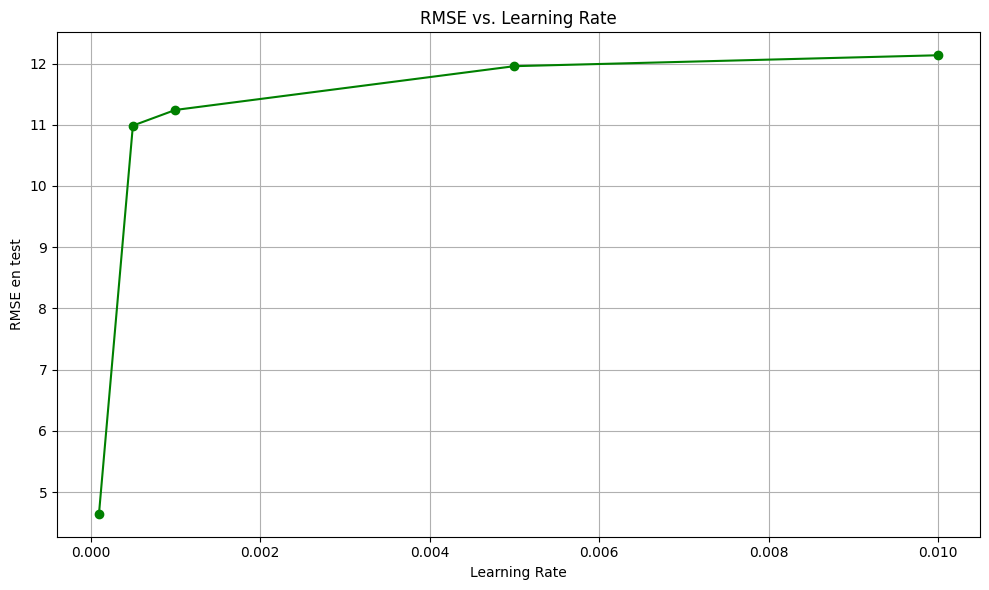

In [ ]:
# Bucle de prueba con diferentes factores latentes
factor_range = list(range(2, 21, 2))
rmse_results = []

ratings, test_ratings = prepare_matrices(train_data, test_data)

# Variables fijas para estas pruebas
num_factors_fixed = 10
regularization_fixed = 0.1

learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]
rmse_lr_results = []

ratings, test_ratings = prepare_matrices(train_data, test_data)

for lr in learning_rates:
    print(f"Probando LEARNING_RATE = {lr}")
    LEARNING_RATE = lr
    REGULARIZATION = regularization_fixed
    p, q = init_factors(NUM_USERS, NUM_ITEMS, num_factors_fixed)
    p, q = train_matrix_factorization(p, q, ratings, num_factors_fixed)
    predictions = get_predictions(p, q, test_ratings)
    rmse = get_rmse(predictions, test_ratings)
    print(f"RMSE: {rmse}")
    rmse_lr_results.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, rmse_lr_results, marker='o', linestyle='-', color='g')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE en test')
plt.title('RMSE vs. Learning Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


En el siguiente caso, se van a hacer las pruebas para hallar el mejor valor como factor latente.

Probando num_factors = 2
RMSE: 4.28959252551629
Probando num_factors = 4
RMSE: 4.26691387381344
Probando num_factors = 6
RMSE: 4.236618520523054
Probando num_factors = 8
RMSE: 4.235413706126908
Probando num_factors = 10
RMSE: 4.2406307859202315
Probando num_factors = 12
RMSE: 4.2289238157558815
Probando num_factors = 14
RMSE: 4.22627954113016
Probando num_factors = 16
RMSE: 4.228143595551712
Probando num_factors = 18
RMSE: 4.218264145118416
Probando num_factors = 20
RMSE: 4.234140557405702


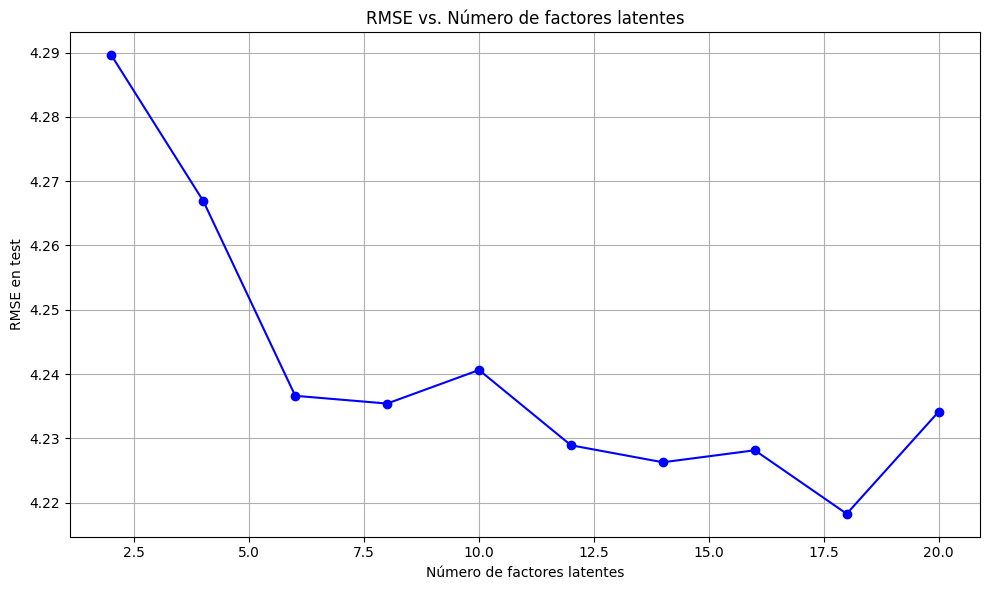

In [ ]:

factor_range = list(range(2, 21, 2))
rmse_results = []

LEARNING_RATE = 0.001
REGULARIZATION = 0.1
NUM_ITERATIONS = 10

ratings, test_ratings = prepare_matrices(train_data, test_data)

for num_factors in factor_range:
    print(f"Probando num_factors = {num_factors}")
    p, q = init_factors(NUM_USERS, NUM_ITEMS, num_factors)
    p, q = train_matrix_factorization(p, q, ratings, num_factors, LEARNING_RATE, REGULARIZATION, NUM_ITERATIONS)
    predictions = get_predictions(p, q, test_ratings)
    rmse = get_rmse(predictions, test_ratings)
    print(f"RMSE: {rmse}")
    rmse_results.append(rmse)

# ------------ Visualización ------------
plt.figure(figsize=(10, 6))
plt.plot(factor_range, rmse_results, marker='o', linestyle='-', color='blue')
plt.xlabel('Número de factores latentes')
plt.ylabel('RMSE en test')
plt.title('RMSE vs. Número de factores latentes')
plt.grid(True)
plt.tight_layout()
plt.show()


## Añadiendo los bias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import random

# -------------- 1. Preprocesamiento ---------------


df = pd.read_excel('jester-data-1.xls',engine='xlrd', header=None)

df = df.iloc[:, 1:]

df.replace(99.0, np.nan, inplace=True)

long_data = df.stack().reset_index()
long_data.columns = ['user_raw', 'item_raw', 'rating']

# Mapear usuarios y items a índices consecutivos
user_mapping = {old: new for new, old in enumerate(sorted(long_data['user_raw'].unique()))}
item_mapping = {old: new for new, old in enumerate(sorted(long_data['item_raw'].unique()))}
long_data['user_id'] = long_data['user_raw'].map(user_mapping)
long_data['item_id'] = long_data['item_raw'].map(item_mapping)

# -------------- 2. División Train/Test ---------------

train_data, test_data = train_test_split(
    long_data[['user_id', 'item_id', 'rating']], test_size=0.2, random_state=42)

NUM_USERS = long_data['user_id'].nunique()
NUM_ITEMS = 100

# Crear matrices vacías
ratings = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)]
test_ratings = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)]

# Rellenar la matriz de entrenamiento
for row in train_data.itertuples(index=False):
    u, i, r = int(row.user_id), int(row.item_id), float(row.rating)
    ratings[u][i] = r

# Rellenar la matriz de test
for row in test_data.itertuples(index=False):
    u, i, r = int(row.user_id), int(row.item_id), float(row.rating)
    test_ratings[u][i] = r


In [ ]:
NUM_FACTORS = 10
NUM_ITERATIONS = 10
LEARNING_RATE = 0.001
REGULARIZATION = 0.1


In [ ]:
# --------- 1. Preparar matrices ---------
def prepare_matrices(train_data, test_data):
    ratings = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)]
    test_ratings = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)]

    for row in train_data.itertuples(index=False):
        ratings[int(row.user_id)][int(row.item_id)] = float(row.rating)
    for row in test_data.itertuples(index=False):
        test_ratings[int(row.user_id)][int(row.item_id)] = float(row.rating)

    return ratings, test_ratings

In [ ]:
# --------- 2. Inicialización ---------
def init_factors_biased(num_users, num_items, num_factors):
    p = [[random.uniform(-0.01, 0.01) for _ in range(num_factors)] for _ in range(num_users)]
    q = [[random.uniform(-0.01, 0.01) for _ in range(num_factors)] for _ in range(num_items)]
    bu = [random.uniform(-0.01, 0.01) for _ in range(num_users)]
    bi = [random.uniform(-0.01, 0.01) for _ in range(num_items)]
    return p, q, bu, bi

def compute_rating_average(ratings):
    total = 0
    count = 0
    for u in range(NUM_USERS):
        for i in range(NUM_ITEMS):
            if ratings[u][i] is not None:
                total += ratings[u][i]
                count += 1
    return total / count if count > 0 else 0

Definimos una nueva función para calcular las predicciones:

In [ ]:
def compute_biased_prediction (avg, b_u, b_i, p_u, q_i):
  deviation = 0
  for k in range(NUM_FACTORS):
    deviation += p_u[k] * q_i[k]

  prediction = avg + b_u + b_i + deviation
  if math.isnan(prediction) or math.isinf(prediction):
        prediction = avg
  return prediction

Calculamos el voto medio:

In [ ]:
def train_biased_mf(p, q, bu, bi, ratings, num_factors, mu):
    for it in range(NUM_ITERATIONS):
        updated_p = [list(row) for row in p]
        updated_q = [list(row) for row in q]
        updated_bu = list(bu)
        updated_bi = list(bi)

        for u in range(NUM_USERS):
            for i in range(NUM_ITEMS):
                if ratings[u][i] is not None:
                    prediction = compute_biased_prediction(mu, bu[u], bi[i], p[u], q[i])
                    error = ratings[u][i] - prediction

                    for k in range(num_factors):
                        updated_p[u][k] += LEARNING_RATE * (error * q[i][k] - REGULARIZATION * p[u][k])
                        updated_q[i][k] += LEARNING_RATE * (error * p[u][k] - REGULARIZATION * q[i][k])

                    updated_bu[u] += LEARNING_RATE * (error - REGULARIZATION * bu[u])
                    updated_bi[i] += LEARNING_RATE * (error - REGULARIZATION * bi[i])

        p, q = updated_p, updated_q
        bu, bi = updated_bu, updated_bi

    return p, q, bu, bi

# --------- 5. Predicciones y métricas ---------
def get_biased_predictions(p, q, bu, bi, mu, test_ratings):
    predictions = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)]
    for u in range(NUM_USERS):
        for i in range(NUM_ITEMS):
            if test_ratings[u][i] is not None:
                pred = compute_biased_prediction(mu, bu[u], bi[i], p[u], q[i])
                predictions[u][i] = max(min(pred, 10), -10)
    return predictions


In [ ]:
def get_user_rmse(u, predictions, test_ratings):
    mse, count = 0, 0
    for i in range(NUM_ITEMS):
        if test_ratings[u][i] is not None and predictions[u][i] is not None:
            mse += (test_ratings[u][i] - predictions[u][i]) ** 2
            count += 1
    return math.sqrt(mse / count) if count > 0 else None

def get_rmse(predictions, test_ratings):
    total_rmse = 0
    count = 0
    for u in range(NUM_USERS):
        rmse = get_user_rmse(u, predictions, test_ratings)
        if rmse is not None and not math.isnan(rmse):
            total_rmse += rmse
            count += 1
    return total_rmse / count if count > 0 else float('nan')

In [ ]:
# --------- 6. Ejecución ---------
ratings, test_ratings = prepare_matrices(train_data, test_data)
rating_average = compute_rating_average(ratings)

p, q, bu, bi = init_factors_biased(NUM_USERS, NUM_ITEMS, NUM_FACTORS)
p, q, bu, bi = train_biased_mf(p, q, bu, bi, ratings, NUM_FACTORS, rating_average)

predictions = get_biased_predictions(p, q, bu, bi, rating_average, test_ratings)
rmse = get_rmse(predictions, test_ratings)
print(f"Biased RMSE: {rmse:.4f}")

Biased RMSE: 5.0021


## ----- BERNOULLI -----

## Carga del dataset


Inicialmente definimos algunas constantes que nos serán necesarias durante la codificación del algoritmo, al igual que se separan los datasets correpsondienetsy se declaran las variables pertinentes. Además, se realiza el proprocesamiento al dataset. Además, por la naturaleza de este método, se ha optado por tomar una muestra en lugar de utilizar todo el dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import random

# ------------ Parámetros generales ------------
NUM_FACTORS = 7
LEARNING_RATE = 0.001
REGULARIZATION = 0.1
NUM_ITERATIONS = 10
N = 5  # recomendaciones por usuario
MIN_RATING = -10
MAX_RATING = 10
SCORES = np.arange(MIN_RATING, MAX_RATING + 0.01, 0.01)


# ------------ 1. Preprocesamiento ------------
df = pd.read_excel('jester-data-1.xls', engine='xlrd', header=None).iloc[:, 1:]

df.replace(99.0, np.nan, inplace=True)


long_data = df.stack().reset_index()
long_data.columns = ['user_raw', 'item_raw', 'rating']

# Tomamos una muestra más pequeña
sample_size = 1000  
sampled_users = long_data['user_raw'].drop_duplicates().sample(sample_size, random_state=42)
long_data = long_data[long_data['user_raw'].isin(sampled_users)]

# Remapeamos usuarios e ítems
user_mapping = {old: new for new, old in enumerate(sorted(long_data['user_raw'].unique()))}
item_mapping = {old: new for new, old in enumerate(sorted(long_data['item_raw'].unique()))}
long_data['user_id'] = long_data['user_raw'].map(user_mapping)
long_data['item_id'] = long_data['item_raw'].map(item_mapping)

NUM_USERS = long_data['user_id'].nunique()
NUM_ITEMS = 100  

# ------------ 2. División Train/Test ------------
train_data, test_data = train_test_split(
    long_data[['user_id', 'item_id', 'rating']], test_size=0.2, random_state=42)


In [ ]:
# ------------ 3. Matrices de ratings ------------
ratings = np.full((NUM_USERS, NUM_ITEMS), np.nan)
test_ratings = np.full((NUM_USERS, NUM_ITEMS), np.nan)

for row in train_data.itertuples(index=False):
    ratings[int(row.user_id), int(row.item_id)] = float(row.rating)

for row in test_data.itertuples(index=False):
    test_ratings[int(row.user_id), int(row.item_id)] = float(row.rating)

# ------------ 4. Inicialización de U y V ------------
U = np.random.rand(len(SCORES), NUM_USERS, NUM_FACTORS)
V = np.random.rand(len(SCORES), NUM_ITEMS, NUM_FACTORS)


In [ ]:
NUM_USERS = 10000
NUM_ITEMS = 100

MIN_RATING = -10
MAX_RATING = 10

SCORES = np.arange(MIN_RATING, MAX_RATING + 0.01, 0.01)

## Inicialización del modelo

Definimos los parámetros necesarios para implementar la factorización matricial mediante BeMF, al igual que las matrices de factores con valores uniformes aleatorios en el intervalo \[0, 1].

In [ ]:
NUM_FACTORS = 7
LEARNING_RATE = 0.001
REGULARIZATION = 0.1

In [ ]:
U = [[[random.random() for _ in range(NUM_FACTORS)] for _ in range(NUM_USERS)] for _ in range(len(SCORES))]
V = [[[random.random() for _ in range(NUM_FACTORS)] for _ in range(NUM_ITEMS)] for _ in range(len(SCORES))]

## Cálculo de las predicciones



In [ ]:
def logit(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def compute_prediction(u, i):
    logits = np.dot(U[:, u, :], V[:, i, :].T).diagonal()
    probs = logit(logits)
    s_idx = np.argmax(probs)
    return SCORES[s_idx], probs[s_idx]

## Aprendizaje de los factores latentes

El proceso de entrenamiento implicar aplicar las operaciones de actualización de las matrices de factores hasta que el algoritmo converja. En general, esta convergencia suele prefijarse como el número de iteraciones que realizamos sobre las operaciones de actualización:

In [ ]:
NUM_ITERATIONS = 10

In [ ]:
for it in range(NUM_ITERATIONS):
    print(f"Iteración {it + 1} de {NUM_ITERATIONS}")
    for s in range(len(SCORES)):
        for u in range(NUM_USERS):
            rated_items = ~np.isnan(ratings[u])
            for i in np.where(rated_items)[0]:
                r = ratings[u, i]
                dot = np.dot(U[s, u], V[s, i])
                grad = ((1 - logit(dot)) if r == SCORES[s] else -logit(dot))
                U[s, u] += LEARNING_RATE * (grad * V[s, i] - REGULARIZATION * U[s, u])
        for i in range(NUM_ITEMS):
            rated_users = ~np.isnan(ratings[:, i])
            for u in np.where(rated_users)[0]:
                r = ratings[u, i]
                dot = np.dot(U[s, u], V[s, i])
                grad = ((1 - logit(dot)) if r == SCORES[s] else -logit(dot))
                V[s, i] += LEARNING_RATE * (grad * U[s, u] - REGULARIZATION * V[s, i])

# ------------ 7. Predicción ------------
predictions = np.full((NUM_USERS, NUM_ITEMS), np.nan)

for u in range(NUM_USERS):
    for i in range(NUM_ITEMS):
        if not np.isnan(test_ratings[u, i]):
            pred, _ = compute_prediction(u, i)
            predictions[u, i] = pred

# ------------ 8. Métricas (implementa si lo deseas) ------------
def get_mae(preds):
    mask = ~np.isnan(test_ratings)
    return np.mean(np.abs(preds[mask] - test_ratings[mask]))

def get_rmse(preds):
    mask = ~np.isnan(test_ratings)
    return np.sqrt(np.mean((preds[mask] - test_ratings[mask]) ** 2))


print("MAE =", get_mae(predictions))
print("RMSE =", get_rmse(predictions))


Iteración 1 de 10
Iteración 2 de 10
Iteración 3 de 10
Iteración 4 de 10
Iteración 5 de 10
Iteración 6 de 10
Iteración 7 de 10
Iteración 8 de 10
Iteración 9 de 10
Iteración 10 de 10
MAE = 6.36684524626143
RMSE = 7.807222136281935


In [ ]:
N = 5

In [ ]:
def get_precision(preds, test, threshold=0, top_n=5):
    precisions = []

    for u in range(NUM_USERS):
        # Índices de ítems donde hay predicción y test válido
        valid_items = ~np.isnan(preds[u]) & ~np.isnan(test[u])

        if np.sum(valid_items) == 0:
            continue  # salta si no hay datos para ese usuario

        user_preds = preds[u][valid_items]
        user_test = test[u][valid_items]
        item_indices = np.where(valid_items)[0]

        # Tomar top-N ítems predichos
        top_indices = item_indices[np.argsort(user_preds)[::-1][:top_n]]

        # Calcular número de relevantes entre los top-N
        relevant = sum(test[u][i] > threshold for i in top_indices)
        precisions.append(relevant / top_n)

    return np.mean(precisions) if precisions else float('nan')


In [ ]:
def get_recommendations(predictions):
    top_items = np.argsort(predictions)[::-1][:N]
    return top_items.tolist()


In [ ]:
precision = get_precision(predictions, test_ratings, threshold=0, top_n=N)
print("Precision =", precision)


Precision = 0.5982


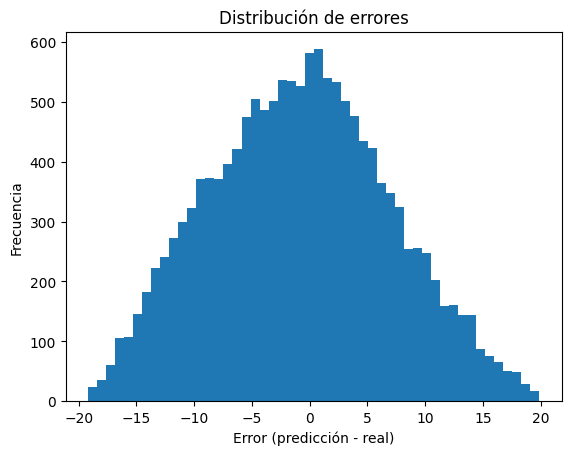

In [ ]:
import matplotlib.pyplot as plt
errors = predictions[~np.isnan(test_ratings)] - test_ratings[~np.isnan(test_ratings)]
plt.hist(errors, bins=50)
plt.title("Distribución de errores")
plt.xlabel("Error (predicción - real)")
plt.ylabel("Frecuencia")
plt.show()


## ----- NEURAL COLLABORATIVE FILTERING -----

In [ ]:
import pandas as pd


file_path = "jester-data-1.csv"

df_tab = pd.read_csv(file_path, delimiter='\t', header=None, on_bad_lines='skip')


print(df_tab.shape)
print(df_tab.head())

(24983, 1)
                                                   0
0  74;-7,82;8,79;-9,66;-8,16;-7,52;-8,5;-9,85;4,1...
1  100;4,08;-0,29;6,36;4,37;-2,38;-9,66;-0,73;-5,...
2  49;99;99;99;99;9,03;9,27;9,03;9,27;99;99;7,33;...
3  48;99;8,35;99;99;1,8;8,16;-2,82;6,21;99;1,84;7...
4  91;8,5;4,61;-4,17;-5,39;1,36;1,6;7,04;4,61;-0,...


In [ ]:
import numpy as np

# Dividimos los datos por ";" y expandir a columnas
df_split = df_tab[0].str.split(';', expand=True)

# Puntos en vez de comas
df_split = df_split.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Convertir a float
df_split = df_split.astype(float)

# Reemplazar los valores 99 por NaN (sin rating)
df_split.replace(99.0, np.nan, inplace=True)

# Separar la columna con el número de ratings (puede ser útil para filtrado)
ratings_count = df_split.iloc[:, 0]
ratings_data = df_split.iloc[:, 1:]  # Solo las columnas con ratings

# Mostrar dimensiones y algunas filas limpias
ratings_data.shape, ratings_data.head(), ratings_count.head()


/var/folders/s8/mfl3ssh12jvfdt_brpcmp0fh0000gn/T/ipykernel_34419/541319789.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_split = df_split.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


((24983, 100),
     1     2     3     4     5     6     7     8     9     10   ...   91   \
 0 -7.82  8.79 -9.66 -8.16 -7.52 -8.50 -9.85  4.17 -8.98 -4.76  ...  2.82   
 1  4.08 -0.29  6.36  4.37 -2.38 -9.66 -0.73 -5.34  8.88  9.22  ...  2.82   
 2   NaN   NaN   NaN   NaN  9.03  9.27  9.03  9.27   NaN   NaN  ...   NaN   
 3   NaN  8.35   NaN   NaN  1.80  8.16 -2.82  6.21   NaN  1.84  ...   NaN   
 4  8.50  4.61 -4.17 -5.39  1.36  1.60  7.04  4.61 -0.44  5.73  ...  5.19   
 
     92    93    94    95    96    97    98    99    100  
 0   NaN   NaN   NaN   NaN   NaN -5.63   NaN   NaN   NaN  
 1 -4.95 -0.29  7.86 -0.19 -2.14  3.06  0.34 -4.32  1.07  
 2   NaN   NaN  9.08   NaN   NaN   NaN   NaN   NaN   NaN  
 3   NaN   NaN  0.53   NaN   NaN   NaN   NaN   NaN   NaN  
 4  5.58  4.27  5.19  5.73  1.55  3.11  6.55  1.80  1.60  
 
 [5 rows x 100 columns],
 0     74.0
 1    100.0
 2     49.0
 3     48.0
 4     91.0
 Name: 0, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Usar los datos limpios cargados previamente: ratings_data

# Para simplificar y reducir tiempo de ejecución, podemos quedarnos con una muestra (opcional)
# Aquí no se reduce, pero puedes activar esto si necesitas:
# ratings_data = ratings_data.sample(n=5000, random_state=42)

# Crear una lista de tripletas (usuario, item, rating)
ratings_long = ratings_data.stack().reset_index()
ratings_long.columns = ['user_id', 'item_id', 'rating']

# Dividir en conjunto de entrenamiento y prueba
train_data, test_data = train_test_split(ratings_long, test_size=0.2, random_state=42)

# Mostrar tamaños de los conjuntos y una muestra
train_data.shape, test_data.shape, train_data.head()


((1448364, 3),
 (362091, 3),
          user_id  item_id  rating
 1206583    16664       24   -4.85
 804465     11153       90    8.98
 718749      9941       97    7.82
 1728002    23847       99   -6.17
 1102038    15260       94   -5.83)

Cargamos los votos de entrenamiento

In [ ]:
import numpy as np

# Asumimos que train_data ya existe y tiene las columnas: 'user_id', 'item_id', 'rating'

# Reasignamos IDs si no empiezan desde 0 o no son consecutivos
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

train_data['user_id_enc'] = user_encoder.fit_transform(train_data['user_id'])
train_data['item_id_enc'] = item_encoder.fit_transform(train_data['item_id'])

# Definir número de usuarios e ítems
NUM_USERS = train_data['user_id_enc'].nunique()
NUM_ITEMS = train_data['item_id_enc'].nunique()

# Crear arrays X_train (usuarios, ítems) e y_train (ratings)
X_train = [
    train_data['user_id_enc'].values,
    train_data['item_id_enc'].values
]
y_train = train_data['rating'].values


In [ ]:
X_train

[array([16664, 11153,  9941, ...,  1866,  9277,  1720]),
 array([23, 89, 96, ..., 33, 20, 74])]

In [ ]:
y_train

array([-4.85,  8.98,  7.82, ..., -3.93,  4.9 , -8.69])

Ahora cargamos los votos de test

In [ ]:
# Aseguramos que test_data use los mismos codificadores que train_data
test_data['user_id_enc'] = user_encoder.transform(test_data['user_id'])
test_data['item_id_enc'] = item_encoder.transform(test_data['item_id'])

# Crear arrays X_test (usuarios, ítems) e y_test (ratings)
X_test = [
    test_data['user_id_enc'].values,
    test_data['item_id_enc'].values
]
y_test = test_data['rating'].values


In [ ]:
X_test

[array([  323,  1346, 19754, ..., 15821, 17910, 21255]),
 array([50, 68, 98, ..., 20, 51, 11])]

In [ ]:
y_test

array([-6.55,  2.04,  0.92, ...,  4.42,  1.75,  9.03])

### Primero mediante GMF (Generalized Matrix Factorization)

Definimos los hiperparámetros y la arquitectura para GMF (Generalized Matrix Factorization)

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dot

# Hiperparámetros
latent_dim = 5
epochs = 10

# Capas de entrada
user_input = Input(shape=[1], name="user_input")
item_input = Input(shape=[1], name="item_input")

# Embeddings
user_embedding = Embedding(input_dim=NUM_USERS, output_dim=latent_dim, name="user_embedding")(user_input)
item_embedding = Embedding(input_dim=NUM_ITEMS, output_dim=latent_dim, name="item_embedding")(item_input)

# Aplanar vectores de embedding
user_vec = Flatten(name="user_flatten")(user_embedding)
item_vec = Flatten(name="item_flatten")(item_embedding)

# Producto punto entre vectores de usuario y de ítem
output = Dot(axes=1, name="dot_product")([user_vec, item_vec])

# Modelo Generalized Matrix Factorization (GMF)
GMF = Model(inputs=[user_input, item_input], outputs=output)


Compilamos y entrenamos el modelo:

In [ ]:
# Compilar y entrenar el modelo
GMF.compile(
    optimizer='adam',
    loss='mean_squared_error',  # MSE como función de pérdida
    metrics=['mae']             # MAE como métrica adicional
)

# Mostrar resumen del modelo
GMF.summary()

# Entrenamiento
GMF.fit(
    x=X_train,
    y=y_train,
    epochs=epochs,
    verbose=1
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 5)      │    124,915 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 5)      │        500 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_flatten        │ (None, 5)         │          0 │ user_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_flatten        │ (None, 5)         │          0 │ item_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_product (Dot)   │ (None, 1)         │          0 │ user_flatten[0][… │
│                     │                   │            │ item_flatten[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 125,415 (489.90 KB)

 Trainable params: 125,415 (489.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 29s 625us/step - loss: 25.2188 - mae: 4.1763
Epoch 2/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 27s 598us/step - loss: 18.5642 - mae: 3.3896
Epoch 3/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 26s 572us/step - loss: 17.6198 - mae: 3.2627
Epoch 4/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 27s 591us/step - loss: 17.0226 - mae: 3.1903
Epoch 5/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 28s 617us/step - loss: 16.3885 - mae: 3.1112
Epoch 6/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 28s 610us/step - loss: 15.7995 - mae: 3.0349
Epoch 7/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 26s 579us/step - loss: 15.4355 - mae: 2.9878
Epoch 8/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 27s 588us/step - loss: 15.2729 - mae: 2.9631
Epoch 9/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 27s 599us/step - loss: 15.1328 - mae: 2.9445
Epoch 10/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 26s 585us/step - loss: 15.1353 - mae: 2.9433


Estimamos las predicciones del test

In [ ]:
# Estimar predicciones sobre el conjunto de test
y_pred = GMF.predict(X_test, verbose=1)

y_pred[:10], y_test[:10]


11316/11316 ━━━━━━━━━━━━━━━━━━━━ 3s 260us/step


(array([[-2.432694 ],
        [ 1.8538098],
        [ 0.942538 ],
        [ 2.4869208],
        [-2.050215 ],
        [-2.348381 ],
        [ 1.0911618],
        [-3.149315 ],
        [ 2.8631284],
        [ 2.9106283]], dtype=float32),
 array([-6.55,  2.04,  0.92,  6.6 , -8.06,  4.95, -2.38,  3.4 , -0.29,
         4.9 ]))

Medimos el error

In [ ]:
from sklearn.metrics import mean_absolute_error

# Aplanar y_pred por si tiene forma (n,1)
mae = mean_absolute_error(y_test, y_pred.ravel())
print(f"MAE en test: {mae:.4f}")


MAE en test: 3.1938


### Ahora mediante Multi Layer Perceptron (MLP)

Definimos los hiperparametros y la arquitectura

Usamos linear, ya que ReLu no puede proporcionar valores negativos, por lo cual el MAE se vería sesgado.

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dense, Concatenate

# Hiperparámetros
latent_dim = 5
epochs = 10

# Entradas
user_input = Input(shape=[1], name="user_input")
item_input = Input(shape=[1], name="item_input")

# Embeddings
user_embedding = Embedding(input_dim=NUM_USERS, output_dim=latent_dim, name="user_embedding")(user_input)
item_embedding = Embedding(input_dim=NUM_ITEMS, output_dim=latent_dim, name="item_embedding")(item_input)

# Flatten
user_vec = Flatten(name="user_flatten")(user_embedding)
item_vec = Flatten(name="item_flatten")(item_embedding)

# Concatenación
concat = Concatenate(name="concatenated_features")([user_vec, item_vec])

# Capas densas del MLP (para 10 y 20 neuronas)
dense1 = Dense(20, activation='relu', name="dense_1")(concat)
dense2 = Dense(10, activation='relu', name="dense_2")(dense1)
output = Dense(1, activation='linear', name="prediction")(dense2)

# Modelo MLP
MLP = Model(inputs=[user_input, item_input], outputs=output)


Compilamos y entrenamos el modelo

In [ ]:
# Compilar el modelo MLP
MLP.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Mostrar resumen del modelo
MLP.summary()

# Entrenamiento
MLP.fit(
    x=X_train,
    y=y_train,
    epochs=epochs,
    verbose=1
)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 5)      │    124,915 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 5)      │        500 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_flatten        │ (None, 5)         │          0 │ user_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_flatten        │ (None, 5)         │          0 │ item_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenated_featu… │ (None, 10)        │          0 │ user_flatten[0][… │
│ (Concatenate)       │                   │            │ item_flatten[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 20)        │        220 │ concatenated_fea… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10)        │        210 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prediction (Dense)  │ (None, 1)         │         11 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 125,856 (491.62 KB)

 Trainable params: 125,856 (491.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 32s 702us/step - loss: 21.1038 - mae: 3.7029
Epoch 2/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 30s 653us/step - loss: 17.7748 - mae: 3.3071
Epoch 3/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 29s 648us/step - loss: 17.1665 - mae: 3.2243
Epoch 4/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 32s 700us/step - loss: 16.7636 - mae: 3.1683
Epoch 5/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 30s 652us/step - loss: 16.4263 - mae: 3.1231
Epoch 6/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 30s 653us/step - loss: 16.1302 - mae: 3.0852
Epoch 7/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 30s 664us/step - loss: 15.8867 - mae: 3.0529
Epoch 8/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 30s 656us/step - loss: 15.7005 - mae: 3.0282
Epoch 9/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 29s 650us/step - loss: 15.5470 - mae: 3.0096
Epoch 10/10
45262/45262 ━━━━━━━━━━━━━━━━━━━━ 29s 649us/step - loss: 15.3821 - mae: 2.9878


Calculamos las predicciones

In [ ]:
# Generar predicciones
y_pred = MLP.predict(X_test, verbose=1)

# Asegurarse de que las dimensiones coinciden
y_pred = y_pred.ravel()  # Aplanar para que tenga forma (n,) como y_test

y_pred


11316/11316 ━━━━━━━━━━━━━━━━━━━━ 3s 263us/step


array([-1.9501    ,  2.1839194 ,  1.0501406 , ...,  2.442042  ,
       -0.02833611,  6.0975237 ], dtype=float32)

Medimos el error

In [ ]:
from sklearn.metrics import mean_absolute_error

# Aplanar predicciones en caso de que tengan forma (n, 1)
mae = mean_absolute_error(y_test, y_pred.ravel())

print(f"MAE del modelo MLP: {mae:.4f}")


MAE del modelo MLP: 3.2260


# RESUMEN DE MEJORES MAEs

- Media Global: 4.3701
- KNN (Deviation from Mean Predition + JMSD): 3.4513
- Matrix Factorization (con bias): 3.46366
- Bernoulli: 6.36684
- Neural Collaborative Filtering (GMF): 3.1938


Siendo la mejor Neural Collaborative Filtering (con GMF) al tener el MAE más pequeño, 3.1938.